In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Scraping Stock Data from yfinance

In [13]:
# Get stock data
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [14]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818436,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400


In [15]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200


In [16]:
# Create new features like moving averages
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

In [17]:
# Drop rows with missing values
stock_data = stock_data.dropna()

In [18]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
count,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02,557.000000,557.000000
mean,145.205745,146.970377,143.481544,145.274219,143.042362,9.112202e+07,144.229905,136.269294
std,16.834607,17.052178,16.662639,16.895876,16.934748,2.771383e+07,16.312065,21.642486
min,109.110001,110.680000,107.320000,108.769997,106.294914,3.519590e+07,115.074600,88.593500
25%,132.080002,133.460007,130.240005,131.960007,129.425522,7.200950e+07,129.098000,122.316750
50%,145.389999,147.100006,143.820007,145.639999,143.527908,8.618550e+07,146.915801,137.818150
75%,156.979996,159.279999,154.410004,156.809998,154.856735,1.051582e+08,157.475601,157.164300
max,182.630005,182.940002,179.119995,182.009995,179.273605,1.954327e+08,172.663800,161.093700


In [19]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_50',
       'SMA_200'],
      dtype='object')

In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 557 entries, 2020-10-15 to 2022-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       557 non-null    float64
 1   High       557 non-null    float64
 2   Low        557 non-null    float64
 3   Close      557 non-null    float64
 4   Adj Close  557 non-null    float64
 5   Volume     557 non-null    int64  
 6   SMA_50     557 non-null    float64
 7   SMA_200    557 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 39.2 KB


In [21]:
# Features for the model
features = ['Open', 'High', 'Low', 'SMA_50', 'SMA_200']

# Target variable
target = 'Close'

In [22]:
# Split the data into X and y
X = stock_data[features]
y = stock_data[target]

Split the data into training and testing sets:

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Regression Model

In [26]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [27]:
model

LinearRegression()

Evaluate the Model

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.427487082802522
R-squared: 0.994471500247115


 Visualize the Results

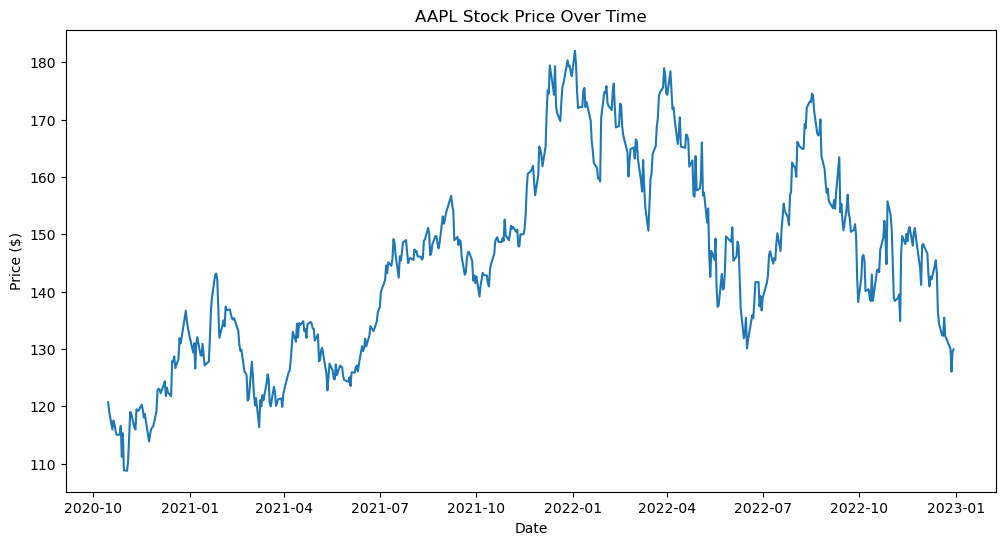

In [31]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'])
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

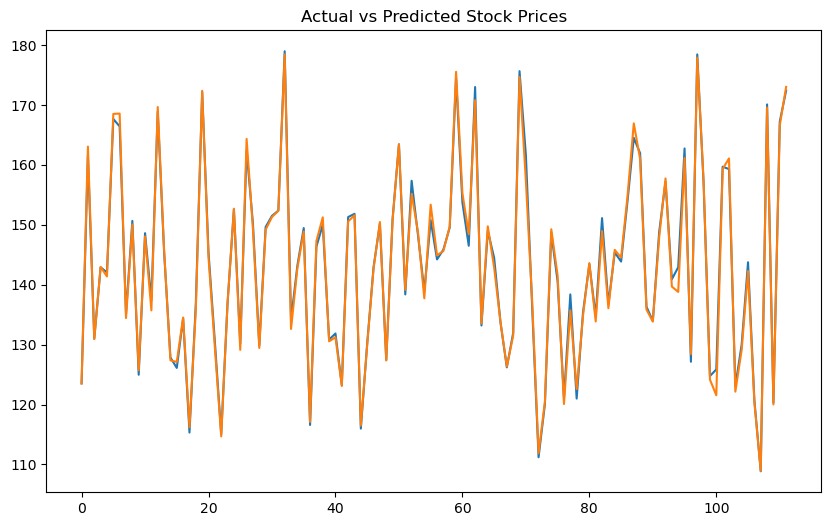

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

In [50]:
import pickle 

In [52]:
pickle.dump(model,open('model.pkl','wb'))